In [1]:
import numpy as np 
import pandas as pd

In [7]:
MLE=[]
x=np.linspace(0,1,100)

for i in x:
    MLE.append((i**3)*(1-i)**7)
    
print(MLE)

[0.0, 9.599101499642934e-07, 7.1472698728423075e-06, 2.2434192881059485e-05, 4.941892169807201e-05, 8.962992690151548e-05, 0.00014370849626798486, 0.00021157140274175593, 0.00029255515917690766, 0.0003855432894295317, 0.0004890779695638971, 0.0006014573196434349, 0.0007208195557641319, 0.0008452151436141852, 0.000972668028869531, 0.001101226956119917, 0.0012290078267244528, 0.0013542279869789425, 0.0014752332811995817, 0.001590518649748776, 0.0016987429996086162, 0.00179873902480604, 0.0018895186057705444, 0.0019702743705204886, 0.002040377956387554, 0.002099375468760275, 0.0021469805930171555, 0.002183065777387049, 0.002207651867879574, 0.0022208965416308656, 0.002223081851969985, 0.0022146011671887447, 0.0021959457553522447, 0.0021676912394790766, 0.0021304841210088034, 0.002085028544619797, 0.002032073454122655, 0.0019724002672931937, 0.001906811177084259, 0.001836118167627142, 0.0017611328157611415, 0.0016826569324736999, 0.0016014740835533794, 0.001518342014913574, 0.0014339859953

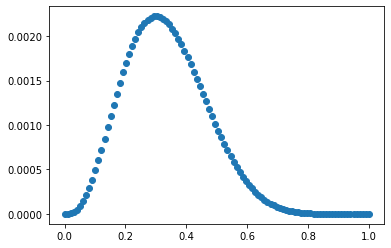

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x,MLE)

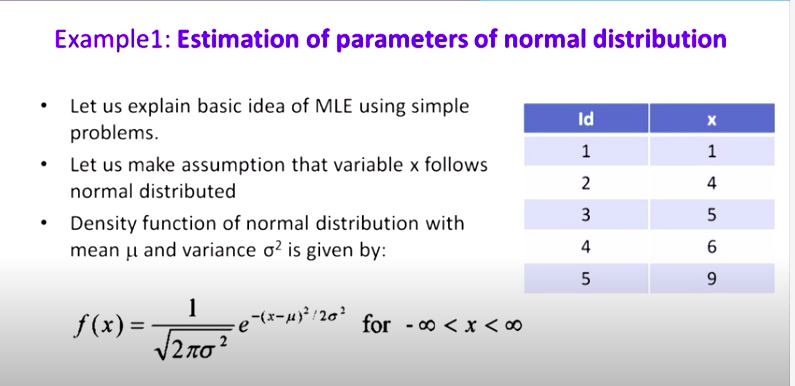

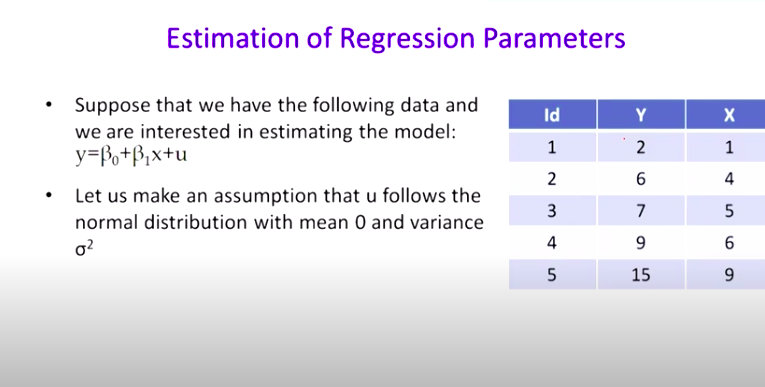

In [11]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize

In [13]:
data={'id':[1,2,3,4,5],'Y':[2,6,7,9,15],'X':[1,4,5,6,9]}
data=pd.DataFrame(data)
data

,id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [28]:
import statsmodels.api as sm 
x=data.X
y=data.Y
x=sm.add_constant(x)
mod1=sm.OLS(y,x)
mod2=mod1.fit()
mod2.summary()

/home/abhilash/miniconda3/envs/py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Fri, 01 Jan 2021   Prob (F-statistic):            0.00122
Time:                        18:09:19   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.728      -2.692       2.115
X              1.6176      0.134     12.079      0.001       1.191       2.044
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.405
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.089   Prob(JB):                        0.759
Kurtosis:                       1.384   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
e=mod2.resid
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [30]:
np.std(e)

0.6048820983804831

In [46]:
def lik(parameters):
    m=parameters[0]
    b=parameters[1]
    sigma=parameters[2]
    y_hat=m*x+b
    L=-np.sum( stats.norm.logpdf(y, loc=y_hat, scale=sigma) )
    return L


In [47]:
x=np.array([1,4,5,6,9])
y=np.array([2,6,7,9,15])
lik_model=minimize(lik,np.array([2,2,2]),method='L-BFGS-B')

In [48]:
lik_model

      fun: 4.581084072761957
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.28306309e-06, -3.55271368e-06, -5.77315970e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 172
      nit: 20
     njev: 43
   status: 0
  success: True
        x: array([ 1.61764714, -0.28823598,  0.60488188])